In [8]:
from centigrad.nn import Module, Linear, Tanh
from centigrad.losses import MSELoss
from centigrad.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

## Make up dataset

In [9]:
xs = np.random.randn(4, 3)
ys = np.array([1.0, -1.0, -1.0, 1.0]).reshape(4, 1)

## Define model

In [10]:
class BobNet(Module):
    def __init__(self):
        self.l1 = Linear(3, 4)
        self.a1 = Tanh()
        self.l2 = Linear(4, 4)
        self.a2 = Tanh()
        self.l3 = Linear(4, 1)
        self.a3 = Tanh()
    def forward(self, x):
        out = self.l1(x)
        out = self.a1(out)
        out = self.l2(out)
        out = self.a2(out)
        out = self.l3(out)
        out = self.a3(out)
        return out
    def parameters(self):
        params = []
        params.extend(self.l1.parameters())
        params.extend(self.l2.parameters())
        params.extend(self.l3.parameters())
        return params

In [11]:
model = BobNet()
loss_function = MSELoss()
optim = SGD(model.parameters(), lr=0.1, momentum=0)
losses = []

## Training

In [12]:
for k in range(100):
    out = np.array([model(x) for x in xs])
    loss = loss_function(out, ys)
    losses.append(loss.data)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if k % 10 == 0: print(f"loss after {k} steps: {loss.data}")

loss after 0 steps: 0.9814211545628913
loss after 10 steps: 0.4211119888821809
loss after 20 steps: 0.07232323512389036
loss after 30 steps: 0.0284867578450034
loss after 40 steps: 0.01660410080695559
loss after 50 steps: 0.011444362466140992
loss after 60 steps: 0.008632059357584569
loss after 70 steps: 0.006884032148322799
loss after 80 steps: 0.005700883306565433
loss after 90 steps: 0.004850873666928359


## Results

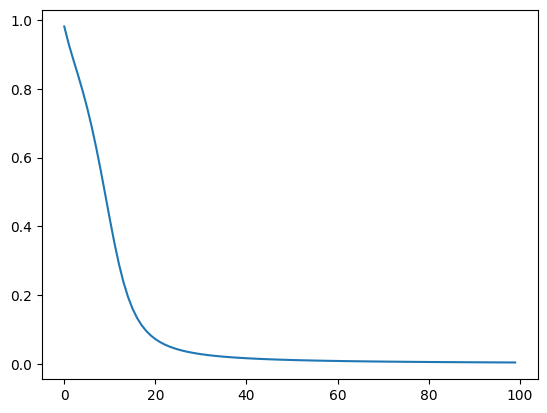

In [13]:
plt.plot(losses)